In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load the data
data = pd.read_csv('data/merged_data.csv')

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Display basic information
print(data.shape)
data.head()

(44592, 27)


,date,hour,load,solar,wind,net load,renewables,nuclear,large hydro,imports,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2020-01-01 00:00:00,0,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,...,1.24,7.4,0.9,23.0,1020.4,0.0,9.9,0.0,0.0,0
1,2020-01-01 01:00:00,1,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,...,1.22,8.3,4.0,315.0,1020.2,0.0,9.9,0.0,0.0,0
2,2020-01-01 02:00:00,2,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,...,1.21,8.7,4.0,4.0,1021.0,0.0,9.9,0.0,0.0,0
3,2020-01-01 03:00:00,3,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,...,1.19,7.4,7.1,123.0,1020.3,0.0,9.9,0.0,0.0,0
4,2020-01-01 04:00:00,4,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,...,1.18,8.3,2.6,307.0,1019.2,16.1,9.9,0.0,0.0,0


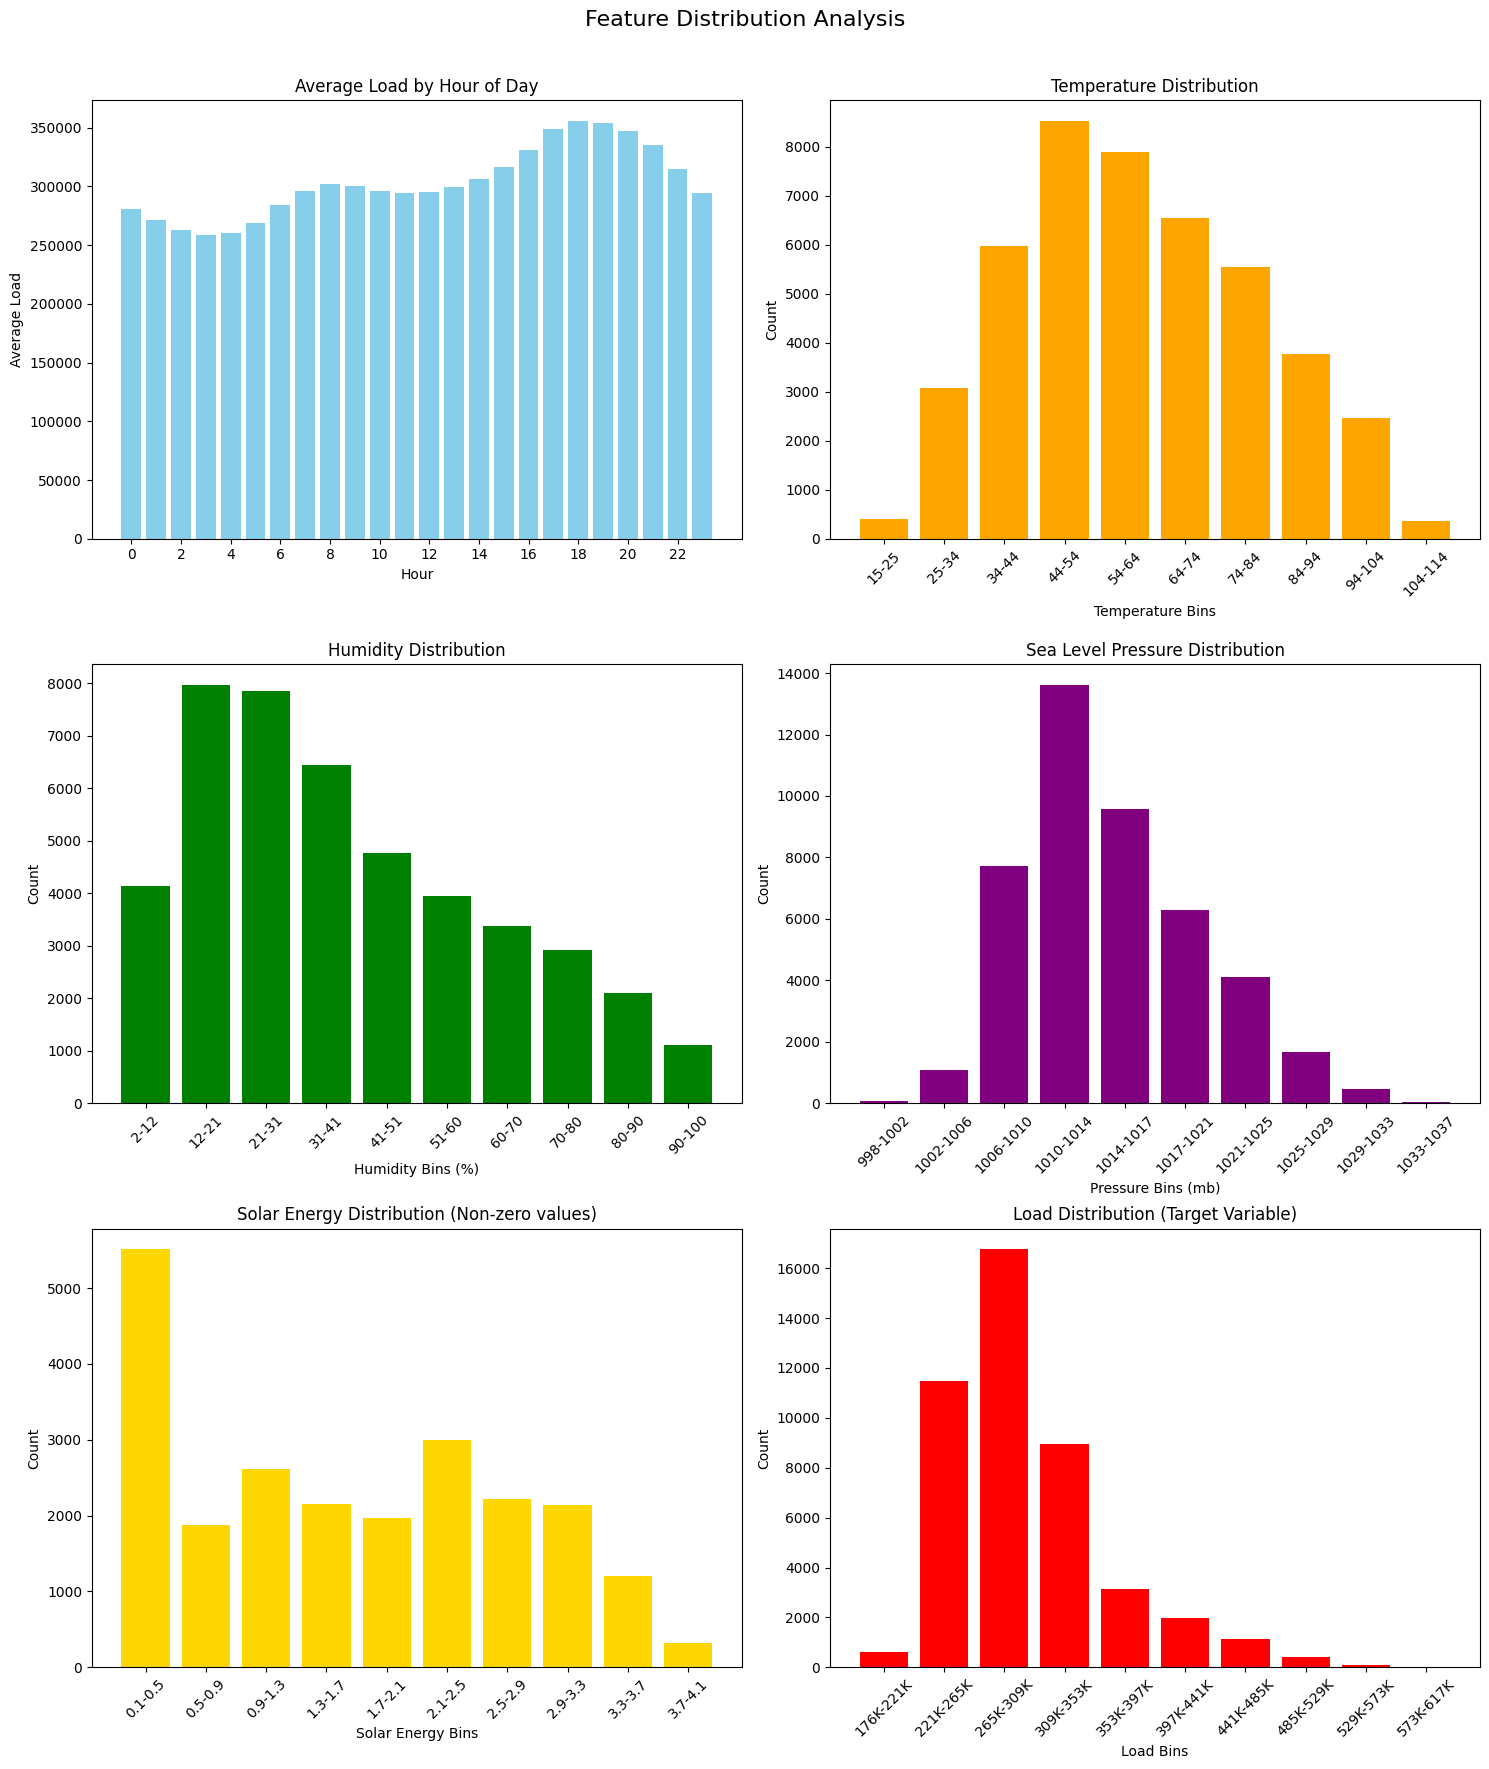

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming 'data' is already loaded from your dataset
# If not, uncomment the next line
# data = pd.read_csv('data/merged_data.csv')

# Create a figure with 6 subplots (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Feature Distribution Analysis', fontsize=16)

# 1. Hour vs Average Load
hour_avg = data.groupby('hour')['load'].mean()
axes[0, 0].bar(hour_avg.index, hour_avg.values, color='skyblue')
axes[0, 0].set_title('Average Load by Hour of Day')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Average Load')
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Temperature - binned distribution
temp_bins = pd.cut(data['temp'], bins=10)
temp_counts = temp_bins.value_counts().sort_index()
axes[0, 1].bar(range(len(temp_counts)), temp_counts.values, color='orange')
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temperature Bins')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks(range(len(temp_counts)))
axes[0, 1].set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in temp_counts.index], rotation=45)

# 3. Humidity - binned distribution
humidity_bins = pd.cut(data['humidity'], bins=10)
humidity_counts = humidity_bins.value_counts().sort_index()
axes[1, 0].bar(range(len(humidity_counts)), humidity_counts.values, color='green')
axes[1, 0].set_title('Humidity Distribution')
axes[1, 0].set_xlabel('Humidity Bins (%)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks(range(len(humidity_counts)))
axes[1, 0].set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in humidity_counts.index], rotation=45)

# 4. Sea Level Pressure - binned distribution
pressure_bins = pd.cut(data['sealevelpressure'], bins=10)
pressure_counts = pressure_bins.value_counts().sort_index()
axes[1, 1].bar(range(len(pressure_counts)), pressure_counts.values, color='purple')
axes[1, 1].set_title('Sea Level Pressure Distribution')
axes[1, 1].set_xlabel('Pressure Bins (mb)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(range(len(pressure_counts)))
axes[1, 1].set_xticklabels([f"{int(bin.left)}-{int(bin.right)}" for bin in pressure_counts.index], rotation=45)

# 5. Solar Energy - binned distribution (excluding zeros for better visualization)
solar_data = data[data['solarenergy'] > 0]['solarenergy']  # Filter out zeros
solar_bins = pd.cut(solar_data, bins=10)
solar_counts = solar_bins.value_counts().sort_index()
axes[2, 0].bar(range(len(solar_counts)), solar_counts.values, color='gold')
axes[2, 0].set_title('Solar Energy Distribution (Non-zero values)')
axes[2, 0].set_xlabel('Solar Energy Bins')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticks(range(len(solar_counts)))
axes[2, 0].set_xticklabels([f"{bin.left:.1f}-{bin.right:.1f}" for bin in solar_counts.index], rotation=45)

# 6. Load (target) - binned distribution
load_bins = pd.cut(data['load'], bins=10)
load_counts = load_bins.value_counts().sort_index()
axes[2, 1].bar(range(len(load_counts)), load_counts.values, color='red')
axes[2, 1].set_title('Load Distribution (Target Variable)')
axes[2, 1].set_xlabel('Load Bins')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xticks(range(len(load_counts)))
axes[2, 1].set_xticklabels([f"{int(bin.left/1000)}K-{int(bin.right/1000)}K" for bin in load_counts.index], rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



Available years in dataset: [2020, 2021, 2022, 2023, 2024, 2025]


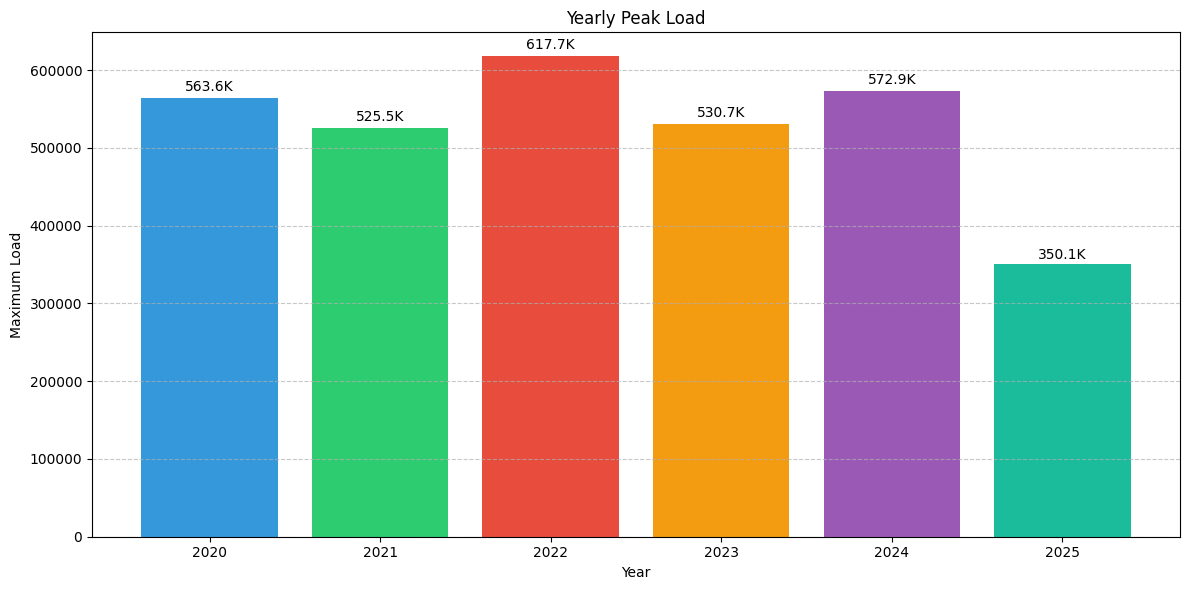

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract year from the datetime column
data['year'] = data['date'].dt.year

# List of years to include
years = sorted(data['year'].unique())
print(f"Available years in dataset: {years}")

# Check which years are available in your data
available_years = [year for year in range(2020, 2026) if year in years]


# Create an additional bar graph showing the yearly change in peak load
if len(available_years) > 1:
    # Calculate yearly peak load (maximum load for each year)
    yearly_peak_load = data.groupby('year')['load'].max()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(yearly_peak_load.index, yearly_peak_load.values, 
           color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c'][:len(available_years)])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (height*0.01),
                f'{height/1000:.1f}K', ha='center', va='bottom', rotation=0)
    
    plt.title('Yearly Peak Load')
    plt.xlabel('Year')
    plt.ylabel('Maximum Load')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Available years in dataset: [2020, 2021, 2022, 2023, 2024, 2025]


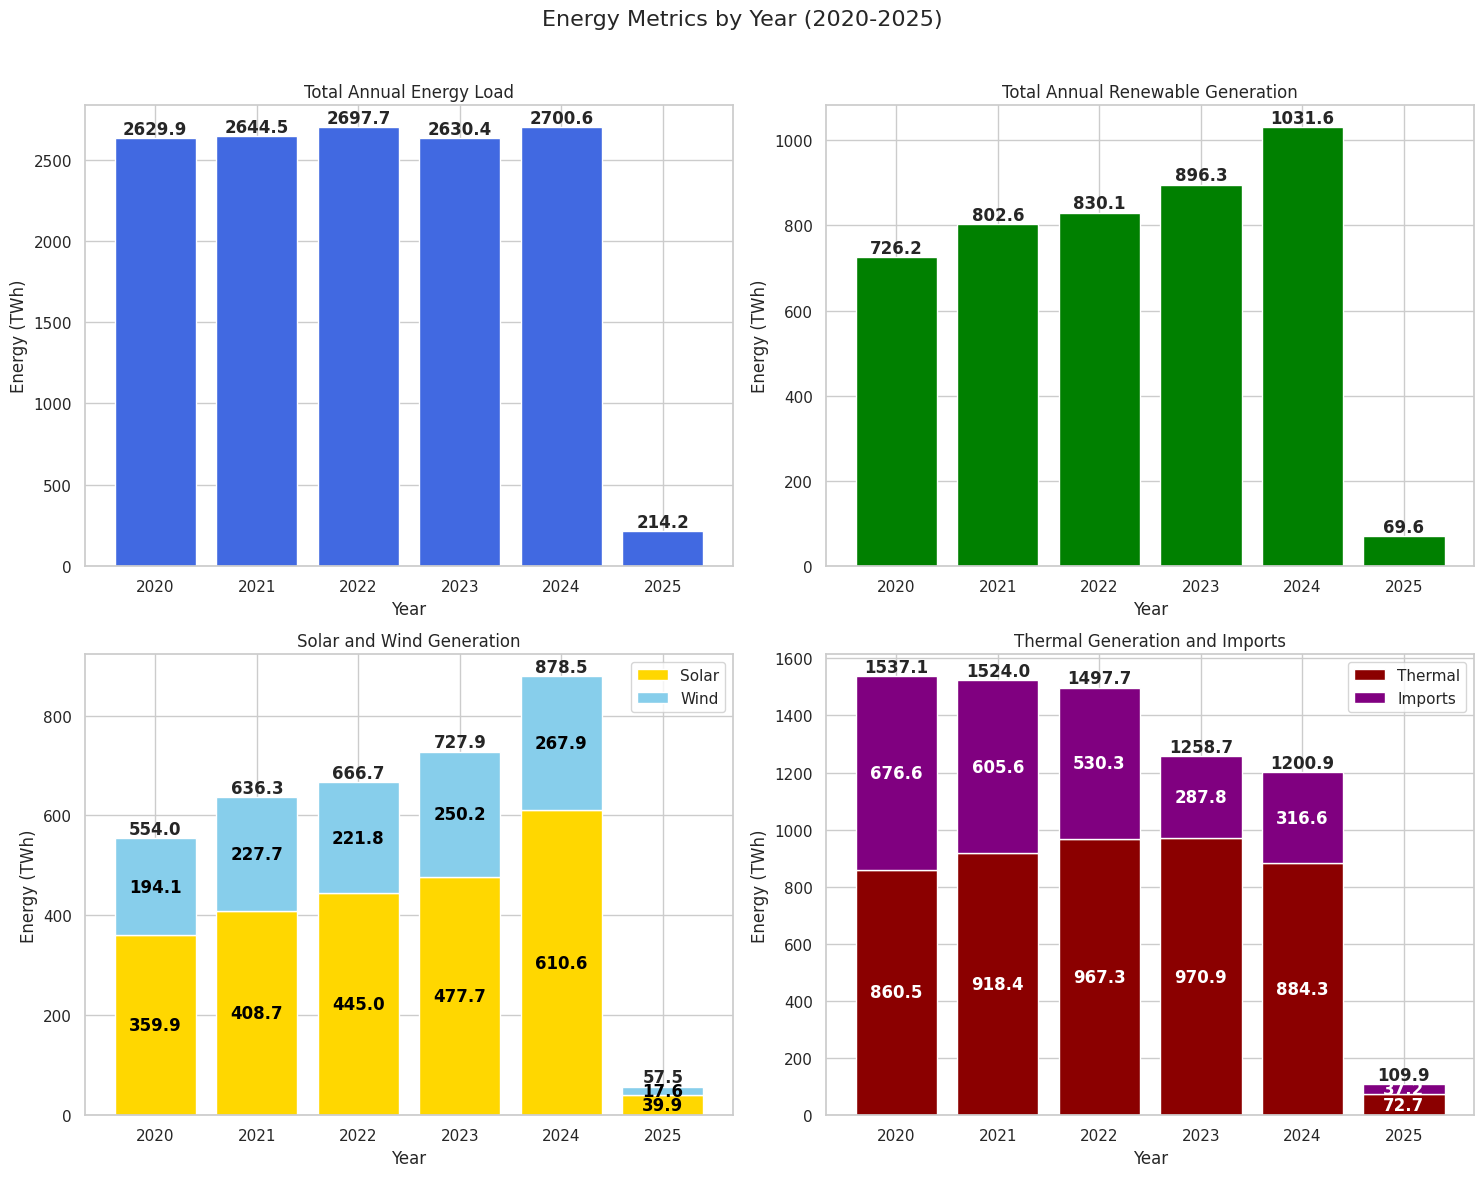

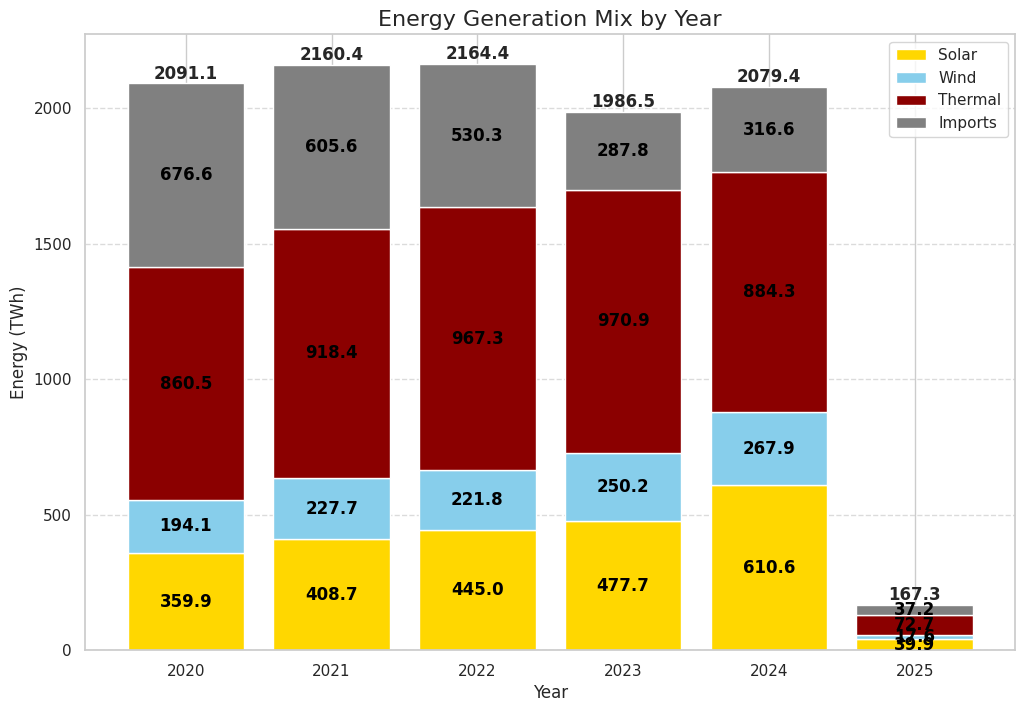

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Assuming 'data' is already loaded
# data = pd.read_csv('data/merged_data.csv')
# data['date'] = pd.to_datetime(data['date'])

# Add year column to the dataset
data['year'] = data['date'].dt.year

# Check what years are actually in the dataset
available_years = sorted(data['year'].unique())
print(f"Available years in dataset: {available_years}")

# Calculate yearly metrics
yearly_metrics = data.groupby('year').agg({
    'load': 'sum',
    'renewables': 'sum',
    'solar': 'sum',
    'wind': 'sum',
    'thermal': 'sum',
    'imports': 'sum'
})

# Convert to TWh (terawatt-hours) for better readability
for col in yearly_metrics.columns:
    yearly_metrics[col] = yearly_metrics[col] / 1000000  # Convert MWh to TWh

# If we need to handle years up to 2025 that aren't in the data
required_years = list(range(2020, 2026))
missing_years = [year for year in required_years if year not in available_years]

if missing_years:
    print(f"Adding placeholder data for years: {missing_years}")
    
    # Create placeholder data (you could implement forecasting here instead)
    for year in missing_years:
        if year - 1 in yearly_metrics.index:
            # Simple placeholder: use previous year's data with slight increase
            yearly_metrics.loc[year] = yearly_metrics.loc[year-1] * 1.02
        else:
            # If no previous year, use the last available year
            yearly_metrics.loc[year] = yearly_metrics.iloc[-1] * 1.02

# Sort the index to ensure years are in order
yearly_metrics = yearly_metrics.sort_index()

# Create bar charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Energy Metrics by Year (2020-2025)', fontsize=16)

# Helper function to add value labels to bars
def add_value_labels(ax, values, is_stacked=False, first_bars=None, fmt='{:.1f}'):
    """Add value labels to bars.
    
    Parameters:
    - ax: The matplotlib axis
    - values: The values to be displayed
    - is_stacked: Whether the bars are stacked (affects positioning)
    - first_bars: Values of first bars (needed for stacked charts)
    - fmt: String format for the values
    """
    for i, v in enumerate(values):
        if is_stacked and first_bars is not None:
            # For stacked bars, position the label at the top of the first bar segment
            y_pos = first_bars[i]
            ax.text(i, y_pos/2, fmt.format(v), 
                    ha='center', va='center', fontweight='bold', color='white')
            
            # Position the second label at the middle of the sum
            total = first_bars[i] + v
            ax.text(i, first_bars[i] + v/2, fmt.format(v), 
                    ha='center', va='center', fontweight='bold', color='white')
            
            # Add total at the top
            ax.text(i, total + 0.5, fmt.format(total), 
                    ha='center', va='bottom', fontweight='bold')
        else:
            # For single bars, position the label at the top of the bar
            ax.text(i, v + 0.5, fmt.format(v), 
                    ha='center', va='bottom', fontweight='bold')

# Total Energy Load
bars = axes[0, 0].bar(range(len(yearly_metrics)), yearly_metrics['load'], color='royalblue')
axes[0, 0].set_title('Total Annual Energy Load')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Energy (TWh)')
axes[0, 0].set_xticks(range(len(yearly_metrics)))
axes[0, 0].set_xticklabels(yearly_metrics.index)
add_value_labels(axes[0, 0], yearly_metrics['load'])

# Renewable Energy Generation
bars = axes[0, 1].bar(range(len(yearly_metrics)), yearly_metrics['renewables'], color='green')
axes[0, 1].set_title('Total Annual Renewable Generation')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Energy (TWh)')
axes[0, 1].set_xticks(range(len(yearly_metrics)))
axes[0, 1].set_xticklabels(yearly_metrics.index)
add_value_labels(axes[0, 1], yearly_metrics['renewables'])

# Solar vs Wind (stacked)
solar_bars = axes[1, 0].bar(range(len(yearly_metrics)), yearly_metrics['solar'], color='gold', label='Solar')
wind_bars = axes[1, 0].bar(range(len(yearly_metrics)), yearly_metrics['wind'], color='skyblue', 
                           bottom=yearly_metrics['solar'], label='Wind')
axes[1, 0].set_title('Solar and Wind Generation')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Energy (TWh)')
axes[1, 0].set_xticks(range(len(yearly_metrics)))
axes[1, 0].set_xticklabels(yearly_metrics.index)
axes[1, 0].legend()

# Add labels for solar (bottom segment)
for i, v in enumerate(yearly_metrics['solar']):
    axes[1, 0].text(i, v/2, f'{v:.1f}', ha='center', va='center', fontweight='bold', color='black')

# Add labels for wind (top segment)
for i, v in enumerate(yearly_metrics['wind']):
    solar_val = yearly_metrics['solar'].iloc[i]
    axes[1, 0].text(i, solar_val + v/2, f'{v:.1f}', ha='center', va='center', fontweight='bold', color='black')
    
    # Add total at the top
    total = solar_val + v
    axes[1, 0].text(i, total + 0.5, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

# Thermal Generation and Imports (stacked)
thermal_bars = axes[1, 1].bar(range(len(yearly_metrics)), yearly_metrics['thermal'], color='darkred', label='Thermal')
import_bars = axes[1, 1].bar(range(len(yearly_metrics)), yearly_metrics['imports'], color='purple', 
                             bottom=yearly_metrics['thermal'], label='Imports')
axes[1, 1].set_title('Thermal Generation and Imports')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Energy (TWh)')
axes[1, 1].set_xticks(range(len(yearly_metrics)))
axes[1, 1].set_xticklabels(yearly_metrics.index)
axes[1, 1].legend()

# Add labels for thermal (bottom segment)
for i, v in enumerate(yearly_metrics['thermal']):
    axes[1, 1].text(i, v/2, f'{v:.1f}', ha='center', va='center', fontweight='bold', color='white')

# Add labels for imports (top segment)
for i, v in enumerate(yearly_metrics['imports']):
    thermal_val = yearly_metrics['thermal'].iloc[i]
    axes[1, 1].text(i, thermal_val + v/2, f'{v:.1f}', ha='center', va='center', fontweight='bold', color='white')
    
    # Add total at the top
    total = thermal_val + v
    axes[1, 1].text(i, total + 0.5, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Alternative: Single plot showing energy mix evolution with value labels
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(yearly_metrics))
totals = np.zeros(len(yearly_metrics))

# Define categories and colors
categories = ['solar', 'wind', 'nuclear', 'large hydro', 'thermal', 'imports']
colors = ['gold', 'skyblue', 'purple', 'lightblue', 'darkred', 'gray']

# Create the stacked bar chart with labels
for col, color in zip(categories, colors):
    if col in yearly_metrics.columns:
        values = yearly_metrics[col].values
        indices = range(len(yearly_metrics))
        plt.bar(indices, values, bottom=bottom, label=col.capitalize(), color=color)
        
        # Add value labels in the middle of each segment
        for i, v in enumerate(values):
            if v > 2:  # Only add label if the segment is large enough to be visible
                plt.text(i, bottom[i] + v/2, f'{v:.1f}', 
                        ha='center', va='center', fontweight='bold', color='black')
        
        bottom += values
        totals += values

# Add total values at the top of each stacked bar
for i, total in enumerate(totals):
    plt.text(i, total + 2, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('Energy Generation Mix by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')
plt.xticks(range(len(yearly_metrics)), yearly_metrics.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

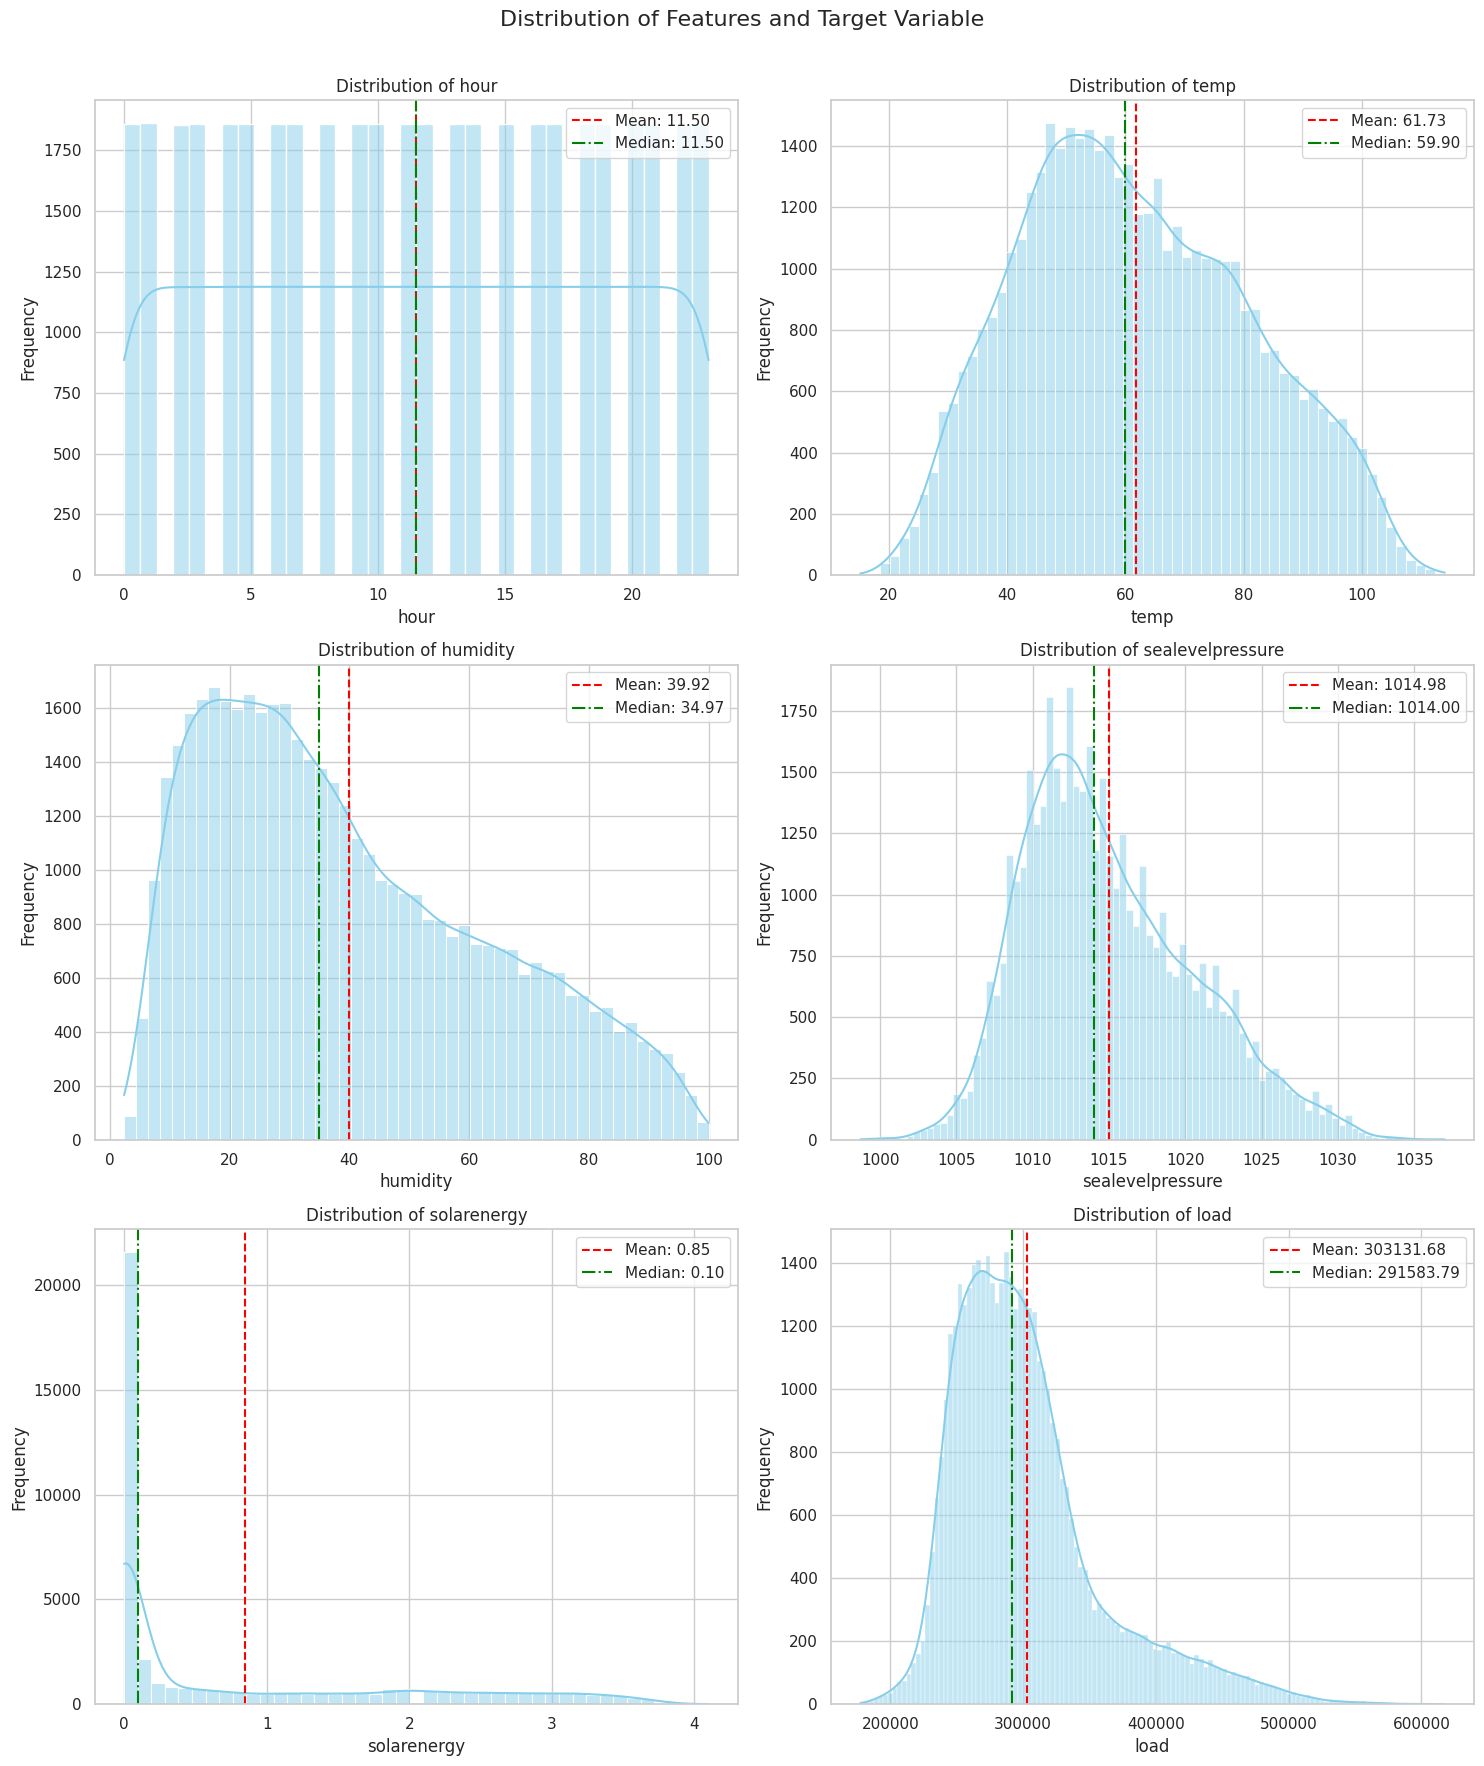

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming 'data' is already loaded
# data = pd.read_csv('data/merged_data.csv')

# Set a consistent style
sns.set(style="whitegrid")

# Define the features and target
features = ['hour', 'temp', 'humidity', 'sealevelpressure', 'solarenergy']
target = 'load'
all_vars = features + [target]

# 1. Histograms with KDE for all variables
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribution of Features and Target Variable', fontsize=16)

for i, var in enumerate(all_vars):
    row, col = i // 2, i % 2
    sns.histplot(data[var], kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = data[var].mean()
    median_val = data[var].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[row, col].legend()

# Remove the empty subplot if there is one
if len(all_vars) < 6:
    axes[2, 1].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
